In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/soumyajit4419/AI_For_Social_Good/master/Dataset/mergedData.csv?token=AK7VCIERPG353P22MNQU4KDAJIQRQ')

In [3]:
df.head()

,text,label
0,truly wanted kill wasn seeking attention d t...,1
1,girlfriend killed week broke hello know start...,1
2,want die want kill wish stop existing,1
3,raped girlfriend feeling like giving know...,1
4,suicide permanent solution temporary problem ...,1


In [4]:
text = df['text']
label = df['label']

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [6]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [7]:
sequence = tokenizer.texts_to_sequences(text)
padded_sequence = pad_sequences(sequence,padding='post')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequence,label,test_size=0.3,shuffle=True,random_state = 42)

In [9]:
# Used a api of globe for faster access
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [10]:
embeddings_index = {};
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size,100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [11]:
model = Sequential()

model.add(Embedding(vocab_size,100,weights=[embeddings_matrix],trainable=False))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2078200   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          34048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,139,193
Trainable params: 60,993
Non-trainable params: 2,078,200
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
248/248 [==============================] - 127s 485ms/step - loss: 0.3320 - accuracy: 0.8882 - val_loss: 0.1290 - val_accuracy: 0.9536
Epoch 2/10
248/248 [==============================] - 119s 480ms/step - loss: 0.1052 - accuracy: 0.9595 - val_loss: 0.1117 - val_accuracy: 0.9615
Epoch 3/10
248/248 [==============================] - 119s 480ms/step - loss: 0.0883 - accuracy: 0.9671 - val_loss: 0.0884 - val_accuracy: 0.9691
Epoch 4/10
248/248 [==============================] - 119s 480ms/step - loss: 0.0718 - accuracy: 0.9722 - val_loss: 0.0792 - val_accuracy: 0.9727
Epoch 5/10
248/248 [==============================] - 119s 479ms/step - loss: 0.0604 - accuracy: 0.9788 - val_loss: 0.0855 - val_accuracy: 0.9703
Epoch 6/10
248/248 [==============================] - 119s 480ms/step - loss: 0.0471 - accuracy: 0.9840 - val_loss: 0.0845 - val_accuracy: 0.9709
Epoch 7/10
248/248 [==============================] - 119s 479ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0913 -

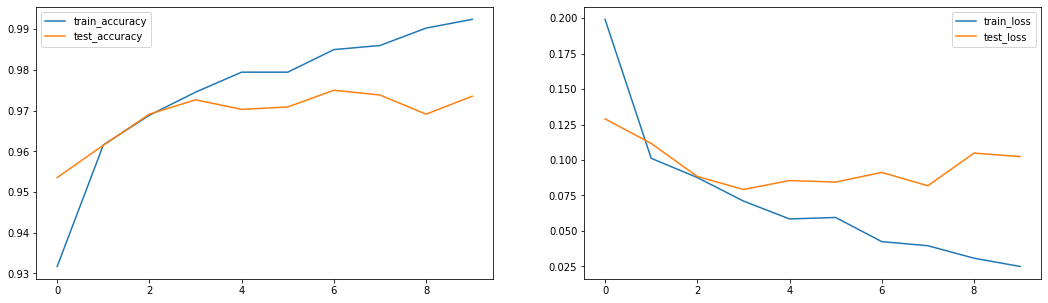

In [15]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()


In [16]:
model.evaluate(x_test,y_test)

107/107 [==============================] - 21s 197ms/step - loss: 0.1024 - accuracy: 0.9735


[0.10243203490972519, 0.9735449552536011]

In [17]:
model.save('./lstm.h5')

In [18]:
pred = model.predict(x_test)

In [21]:
pred = pred>0.5

In [23]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1625
        True       0.97      0.98      0.97      1777

    accuracy                           0.97      3402
   macro avg       0.97      0.97      0.97      3402
weighted avg       0.97      0.97      0.97      3402

